<a href="https://colab.research.google.com/github/SunghyupOh/ML-project/blob/main/ML(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# [1] 필수 라이브러리 임포트
import pandas as pd
import numpy as np
import kagglehub  # Kaggle 데이터셋 로드용
from kagglehub import KaggleDatasetAdapter

# [2] 데이터 로드
# Kaggle Hub를 통해 데이터셋을 다운로드하고 Pandas DataFrame으로 로드합니다.
print("⏳ 데이터 다운로드 및 로드 중...")
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn",
    file_path,
)

# 데이터가 잘 로드되었는지 상위 5개 행 확인
print("\n--- 원본 데이터 상위 5개 행 ---")
print(df.head())

# [3] 데이터 전처리: 불필요한 컬럼 삭제
# customerID는 예측에 도움이 되지 않는 고유 식별자이므로 삭제합니다.
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    print("\n✅ 'customerID' 컬럼 삭제 완료.")

# [4] 데이터 전처리: TotalCharges 타입 변환 및 결측치 처리
# TotalCharges는 수치형이어야 하는데, 데이터에 공백(" ")이 있어 문자열(Object)로 인식된 상태입니다.
# errors='coerce' 옵션으로 숫자가 아닌 값(공백)을 NaN(결측치)으로 강제 변환합니다.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 결측치(NaN) 확인 및 처리
# 가입 기간(tenure)이 0인 신규 고객의 경우 TotalCharges가 비어있을 수 있으므로 0으로 채웁니다.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("\n✅ 'TotalCharges' 변환 및 결측치(0) 처리 완료.")
print(f"변경 후 TotalCharges 데이터 타입: {df['TotalCharges'].dtype}")

⏳ 데이터 다운로드 및 로드 중...


/tmp/ipython-input-937898458.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.

--- 원본 데이터 상위 5개 행 ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic     

데이터 로드 (kagglehub.load_dataset):


blastchar/telco-customer-churn 데이터셋을 불러와 df 변수에 저장합니다.

customerID 삭제:

각 행을 식별하는 ID 값은 이탈 예측 패턴을 찾는 데 방해가 되므로 제거합니다.

TotalCharges(지불금) 처리:

문제: 원본 데이터에서 TotalCharges가 숫자가 아닌 문자열(object)로 되어 있습니다. 일부 행에 빈 문자열(" ")이 들어있기 때문입니다.


해결: pd.to_numeric(..., errors='coerce')를 사용하여 숫자로 바꿀 수 없는 공백을 NaN(결측치)으로 바꿉니다.


보완: NaN이 된 값들은 가입 기간이 0인 신규 고객이므로 0으로 채워줍니다.


📊 [2단계: 탐색적 데이터 분석 (EDA)] 시작


/tmp/ipython-input-2135081824.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


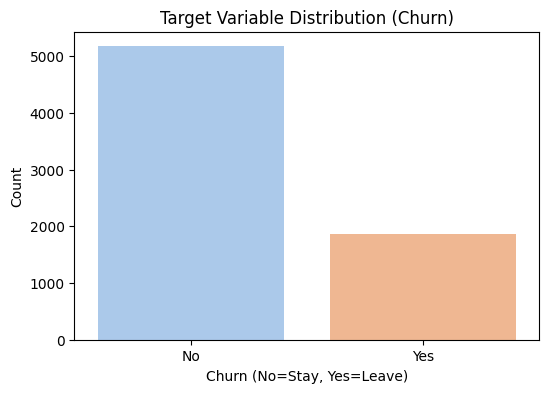


--- 이탈률(Churn) 비율 ---
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


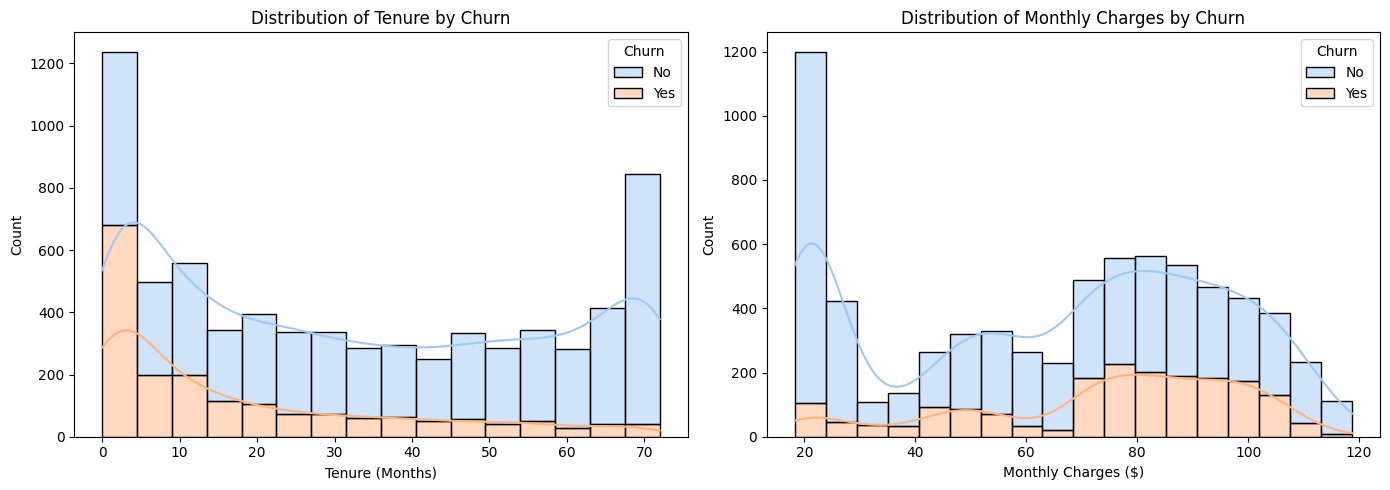

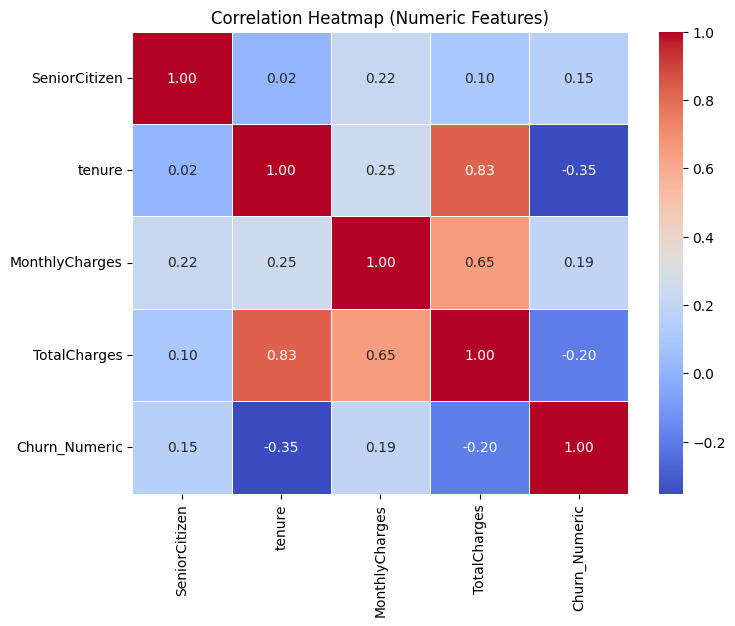

In [ ]:
# ==========================================
# [2단계] 탐색적 데이터 분석 (EDA) - 새로 추가된 파트
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 [2단계: 탐색적 데이터 분석 (EDA)] 시작")

# 1. 타겟 변수(Churn) 불균형 시각화
# 목적: 데이터가 얼마나 불균형한지 눈으로 확인 (정확도 함정 대비)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Target Variable Distribution (Churn)")
plt.xlabel("Churn (No=Stay, Yes=Leave)")
plt.ylabel("Count")
plt.show()

# 정확한 비율 출력
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"\n--- 이탈률(Churn) 비율 ---\n{churn_rate}")


# 2. 주요 수치형 변수(tenure, MonthlyCharges) 분포 확인
# 목적: 가입 기간과 요금이 이탈에 어떤 영향을 주는지 직관적으로 파악
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (1) 가입 기간(tenure) 분포
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, ax=axes[0], palette='pastel')
axes[0].set_title("Distribution of Tenure by Churn")
axes[0].set_xlabel("Tenure (Months)")

# (2) 월 요금(MonthlyCharges) 분포
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True, ax=axes[1], palette='pastel')
axes[1].set_title("Distribution of Monthly Charges by Churn")
axes[1].set_xlabel("Monthly Charges ($)")

plt.tight_layout()
plt.show()


# 3. 상관관계 분석 (Correlation Heatmap)
# 목적: 수치형 변수들끼리, 그리고 정답(Churn)과 얼마나 관련이 있는지 확인
# (주의: 상관관계 분석을 위해 잠시 문자열인 Churn을 숫자로 바꾼 복사본을 사용합니다)
df_temp = df.copy()
df_temp['Churn_Numeric'] = df_temp['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 수치형 데이터만 선택 (TotalCharges, tenure, MonthlyCharges, Churn_Numeric)
numeric_df = df_temp.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

1. 타겟 변수(Churn) 분포
  이탈하지 않은 고객(No)은 약 5,000명 이상인 반면, 이탈 고객(Yes)은 2,000명 미만으로 확인됨. (약 73:27 비율)
  
  클래스 불균형(Class Imbalance)이 존재함. 이 경우 모델이 다수 클래스(No)로만 예측해도 높은 정확도(Accuracy)가 나올 수 있는 '정확도의 역설' 우려가 있음.

  단순 정확도보다는 실제 이탈 고객을 얼마나 잘 탐지하는지를 나타내는 재현율(Recall)과, 모델의 전반적인 변별력을 보여주는 ROC-AUC를 핵심 평가 지표로 선정함.


2. 상관관계 분석
  tenure vs Churn: -0.35
  음의 상관관계, 가입기간이 길수록 이탈을 덜하는 경향이 보임. 또한, 가입 초기 고객의 이탈 위험이 높다고 판단됨.

  MonthlyCharges vs Churn: 0.19
  요금과 이탈 여부의 양의 상관관계 미약하게 보임.
  요금이 비싸면 이탈할 확률이 높아짐.  

  TotalCharges vs tenure: 0.83
  매우 강항 상관관계, 가입기간 총 지불 요금이므로 당연한 결과.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# [1] 타겟 변수(정답지) 인코딩
# 이탈 여부(Churn)를 'No'는 0으로, 'Yes'는 1로 바꿉니다.
# 이미 변환된 경우를 대비해 object 타입일 때만 실행하도록 합니다.
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
    print("✅ 타겟 변수(Churn) 변환 완료 (No->0, Yes->1)")

# [2] 이진 범주형 피처 인코딩 (값의 종류가 2개인 것들)
# 예: 성별(gender), 파트너 유무(Partner) 등
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()

for col in binary_cols:
    # 해당 컬럼이 데이터프레임에 있고, 타입이 문자열(object)인 경우에만 변환
    if col in df.columns and df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        print(f" - {col} 변환 완료: 0={le.classes_[0]}, 1={le.classes_[1]}")

print("✅ 이진 피처 인코딩 완료.\n")


# [3] 다중 범주형 피처 원-핫 인코딩 (One-Hot Encoding)
# 위에서 처리하지 않은 나머지 문자열 컬럼들(인터넷 서비스 종류, 계약 형태 등)을 찾습니다.
object_cols = df.select_dtypes(include='object').columns.tolist()

print(f"ℹ️ 원-핫 인코딩 대상 컬럼: {object_cols}")

# pd.get_dummies를 사용하여 원-핫 인코딩 수행
# drop_first=True: 다중공선성(변수 간 상관관계가 너무 높은 문제)을 피하기 위해 첫 번째 카테고리 컬럼은 삭제합니다.
# dtype=int: True/False 대신 1/0으로 저장합니다.
df_final = pd.get_dummies(df, columns=object_cols, drop_first=True, dtype=int)

print("\n--- 2단계 완료: 인코딩 후 데이터 구조 ---")
print(f"변환 전 컬럼 수: {df.shape[1]}")
print(f"변환 후 컬럼 수: {df_final.shape[1]}")
print(df_final.head())

✅ 타겟 변수(Churn) 변환 완료 (No->0, Yes->1)
 - gender 변환 완료: 0=Female, 1=Male
 - Partner 변환 완료: 0=No, 1=Yes
 - Dependents 변환 완료: 0=No, 1=Yes
 - PhoneService 변환 완료: 0=No, 1=Yes
 - PaperlessBilling 변환 완료: 0=No, 1=Yes
✅ 이진 피처 인코딩 완료.

ℹ️ 원-핫 인코딩 대상 컬럼: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

--- 2단계 완료: 인코딩 후 데이터 구조 ---
변환 전 컬럼 수: 20
변환 후 컬럼 수: 31
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85   

/tmp/ipython-input-3555077037.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})


Label Encoding: "Yes/No"나 "남/여"처럼 두 가지 값만 있는 경우 0과 1로 변환.

One-Hot Encoding: "지불 방식"처럼 3가지 이상의 선택지가 있는 경우, 각 선택지를 별도의 컬럼으로 만들어서 0과 1로 표시.

문자열로 저장되어있던 데이터들 숫자로 인코딩

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# [1] 데이터 분리 (X: 문제, y: 정답)
# 'Churn' 컬럼을 제외한 나머지가 독립변수(X), 'Churn'이 종속변수(y)입니다.
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# [2] 훈련셋과 테스트셋 분리 (8:2 비율)
# stratify=y 옵션은 정답(이탈/유지)의 비율을 훈련셋과 테스트셋에 똑같이 유지해줍니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")


# [3] 데이터 스케일링 (Standardization)
# 값의 범위가 큰 수치형 변수들만 골라서 정규분포(평균 0, 분산 1) 형태로 맞춥니다.
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# 주의: 훈련 데이터(X_train)를 기준으로 학습(fit)하고, 그 기준을 테스트 데이터(X_test)에도 똑같이 적용(transform)해야 합니다.
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("\n--- 3단계 완료: 스케일링 후 훈련 데이터 상위 5개 행 ---")
print(X_train[numerical_features].head())

훈련 데이터 크기: (5634, 30)
테스트 데이터 크기: (1409, 30)

--- 3단계 완료: 스케일링 후 훈련 데이터 상위 5개 행 ---
        tenure  MonthlyCharges  TotalCharges
3738  0.102371       -0.521976     -0.262257
3151 -0.711743        0.337478     -0.503635
4860 -0.793155       -0.809013     -0.749883
3867 -0.263980        0.284384     -0.172722
3810 -1.281624       -0.676279     -0.989374


3단계: 데이터 분리 및 스케일링 (Data Splitting & Scaling)

train 데이터와 test 데이터셋 분리

값의 범위 큰 피처 data들 Standardization(평균 0 , 분산 1)



In [ ]:
# ==========================================
# [4단계] 모델 선택 및 성능 비교 (Model Selection)
# ==========================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

print("\n🤖 [4단계: 모델 선택 및 성능 비교] 시작")

# 1. 후보 모델 정의 (Candidates)
# (1) 로지스틱 회귀: 기준점(Baseline) 역할
# (2) 랜덤 포레스트: 배깅(Bagging) 기법의 대표 모델
# (3) XGBoost: 부스팅(Boosting) 기법의 대표 모델
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 2. 교차 검증 (K-Fold Cross Validation)
# 훈련 데이터(X_train)를 5조각으로 나눠서 검증합니다. (별도의 Validation Set 불필요)
results = {}

print("⏳ 3가지 모델을 경쟁시키는 중... (잠시만 기다려 주세요)")

for name, model in models.items():
    # scoring='roc_auc': 불균형 데이터이므로 정확도보다 ROC-AUC 점수로 평가
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    results[name] = scores.mean()
    print(f"   - {name} 평균 ROC-AUC: {scores.mean():.4f}")

# 3. 결과 비교 및 챔피언 선정
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'ROC-AUC'])
results_df = results_df.sort_values(by='ROC-AUC', ascending=False)

print("\n🏆 [모델 경쟁 결과]")
display(results_df)

best_model_name = results_df.iloc[0]['Model']
print(f"\n✅ 최종 선정된 챔피언 모델: {best_model_name}")
print(f"   -> 5단계부터는 [{best_model_name}] 모델을 집중적으로 튜닝합니다.")


🤖 [4단계: 모델 선택 및 성능 비교] 시작
⏳ 3가지 모델을 경쟁시키는 중... (잠시만 기다려 주세요)
   - Logistic Regression 평균 ROC-AUC: 0.8457
   - Random Forest 평균 ROC-AUC: 0.8219


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:55:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:55:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:55:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:55:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:55:39] WARNING: /w

   - XGBoost 평균 ROC-AUC: 0.8194

🏆 [모델 경쟁 결과]


,Model,ROC-AUC
0,Logistic Regression,0.845678
1,Random Forest,0.821904
2,XGBoost,0.819378



✅ 최종 선정된 챔피언 모델: Logistic Regression
   -> 5단계부터는 [Logistic Regression] 모델을 집중적으로 튜닝합니다.


Logistic Regression, Random Forest, XGBoost 모델 학습 후 비교

Logistic Regression 이 지표가 가장 높게 나옴

세 모델 하이퍼 파라미터 튜닝 후 다시 비교

In [ ]:
# ==========================================
# [5단계] 3대 모델 전수 튜닝 및 최종 챔피언 선정
# ==========================================
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint, loguniform
import pandas as pd

print("\n🔥 [5단계: 모든 모델 전수 튜닝 및 경쟁] 시작")

# 1. 튜닝할 모델과 파라미터 범위 정의
# 각 모델이 학습할 수 있는 최적의 설정 범위를 지정합니다.

model_params = {
    # (1) 로지스틱 회귀: 규제 강도(C)와 방식(penalty) 튜닝
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
        'params': {
            'C': loguniform(1e-4, 100),  # 규제 강도 (작을수록 강한 규제)
            'penalty': ['l1', 'l2']      # 규제 방식
        }
    },

    # (2) 랜덤 포레스트: 나무 개수, 깊이 등 튜닝
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': randint(100, 500),
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10)
        }
    },

    # (3) XGBoost: 학습률, 깊이, 감마 등 튜닝
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': randint(100, 500),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 10),
            'min_child_weight': randint(1, 10),
            'gamma': uniform(0, 0.5),
            'subsample': uniform(0.6, 0.4),
            'colsample_bytree': uniform(0.6, 0.4)
        }
    }
}

# 2. 반복문으로 하나씩 튜닝 수행
tuned_results = []
best_models = {} # 튜닝된 모델들을 저장할 딕셔너리

print("⏳ 각 모델별 최적화 진행 중... (약 3~5분 소요)")

for model_name, mp in model_params.items():
    print(f"   -> [{model_name}] 튜닝 중...")

    clf = RandomizedSearchCV(
        mp['model'],
        mp['params'],
        n_iter=30,             # 모델별로 30번씩 시도
        cv=3,                  # 3번 검증
        scoring='roc_auc',     # 평가 기준
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    clf.fit(X_train, y_train)

    # 결과 저장
    tuned_results.append({
        'Model': model_name,
        'Best ROC-AUC': clf.best_score_,
        'Best Params': clf.best_params_
    })
    best_models[model_name] = clf.best_estimator_

# 3. 최종 결과 비교 및 챔피언 선정
results_df = pd.DataFrame(tuned_results).sort_values(by='Best ROC-AUC', ascending=False)

print("\n🏆 [최종 튜닝 후 성능 순위]")
display(results_df[['Model', 'Best ROC-AUC']])

# 1등 모델 자동 선택
best_model_name = results_df.iloc[0]['Model']
final_best_model = best_models[best_model_name]

print(f"\n✅ 모든 튜닝을 마친 후 최종 챔피언 모델: {best_model_name}")
print(f"   -> ROC-AUC 점수: {results_df.iloc[0]['Best ROC-AUC']:.4f}")
print("   -> 이제 이 모델로 임계값 조정(6단계)과 분석(7단계)을 진행합니다.")


🔥 [5단계: 모든 모델 전수 튜닝 및 경쟁] 시작
⏳ 각 모델별 최적화 진행 중... (약 3~5분 소요)
   -> [LogisticRegression] 튜닝 중...
   -> [RandomForest] 튜닝 중...
   -> [XGBoost] 튜닝 중...

🏆 [최종 튜닝 후 성능 순위]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:04:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Best ROC-AUC
2,XGBoost,0.850892
1,RandomForest,0.847819
0,LogisticRegression,0.846349



✅ 모든 튜닝을 마친 후 최종 챔피언 모델: XGBoost
   -> ROC-AUC 점수: 0.8509
   -> 이제 이 모델로 임계값 조정(6단계)과 분석(7단계)을 진행합니다.


세 모델의 하이퍼파라미터 튜닝 후 성능 비교
XGBoost 의 성능이 가장 높게 나옴

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

print("\n🤝 [5.5단계: 앙상블 생성 및 전체 모델 통합 성능 비교]")

# 1. 앙상블 모델(Voting) 생성 및 학습
# (5단계에서 튜닝된 best_models를 활용)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_models['LogisticRegression']),
        ('rf', best_models['RandomForest']),
        ('xgb', best_models['XGBoost'])
    ],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)

# 2. 모든 모델의 예측 확률 수집
# (이미 튜닝된 3개 모델 + 방금 만든 앙상블 모델)
models_to_compare = {
    'LogisticRegression': best_models['LogisticRegression'],
    'RandomForest': best_models['RandomForest'],
    'XGBoost': best_models['XGBoost'],
    'Ensemble(Voting)': voting_clf
}

# 3. 테스트 데이터셋으로 ROC-AUC 점수 비교
final_scores = []

print("⏳ 전체 모델 성능 평가 중...")
for name, model in models_to_compare.items():
    # 확률 예측 (이탈 클래스 1일 확률)
    prob = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, prob)
    final_scores.append({'Model': name, 'Test ROC-AUC': score})

# 4. 결과 출력 및 챔피언 선정
comparison_df = pd.DataFrame(final_scores).sort_values(by='Test ROC-AUC', ascending=False)
print("\n🏆 [최종 모델 성능 순위 (Test Set 기준)]")
display(comparison_df)

# 가장 점수가 높은 모델 자동 선택
best_model_name = comparison_df.iloc[0]['Model']
final_best_model = models_to_compare[best_model_name]

print(f"\n✅ 최종 선정된 챔피언 모델: {best_model_name}")
print(f"   (점수 차이가 0.01 미만이면, 설명력이 좋은 XGBoost나 RF를 선택하는 것이 유리합니다.)")


🤝 [5.5단계: 앙상블 생성 및 전체 모델 통합 성능 비교]
⏳ 전체 모델 성능 평가 중...

🏆 [최종 모델 성능 순위 (Test Set 기준)]


,Model,Test ROC-AUC
2,XGBoost,0.848112
3,Ensemble(Voting),0.847413
1,RandomForest,0.844474
0,LogisticRegression,0.841003



✅ 최종 선정된 챔피언 모델: XGBoost
   (점수 차이가 0.01 미만이면, 설명력이 좋은 XGBoost나 RF를 선택하는 것이 유리합니다.)



⚖️ [6단계: 임계값(Threshold) 정밀 조정] 시작

🎯 목표 재현율: 70.0%
 -> 발견된 최적 임계값: 0.3834
 -> 이때의 실제 재현율: 0.7005
 -> 이때의 기대 정밀도: 0.5888

[비교] 기본 모델(0.5) vs 조정된 모델
--------------------------------------------------
1️⃣ 기본 모델 (Threshold = 0.5)
[[930 105]
 [176 198]]

2️⃣ 조정 모델 (Threshold = 0.3834)
[[852 183]
 [112 262]]

📊 최종 조정 모델 리포트
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1035
           1       0.59      0.70      0.64       374

    accuracy                           0.79      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.79      0.80      1409



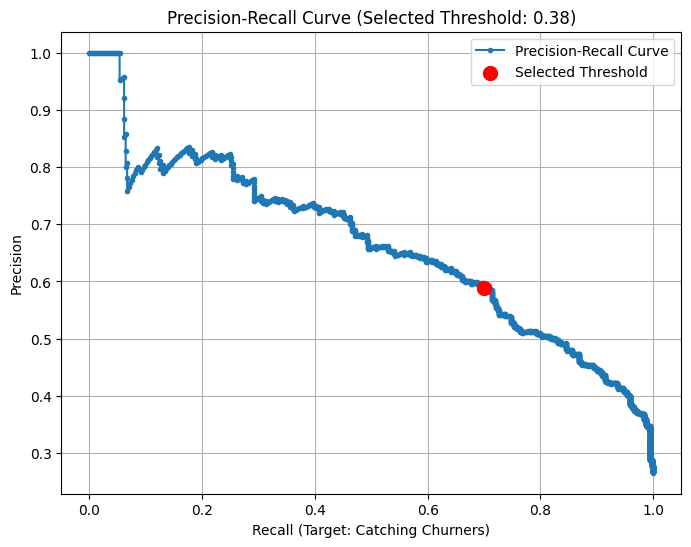

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

print("\n⚖️ [6단계: 임계값(Threshold) 정밀 조정] 시작")

# 1. 정밀도-재현율 곡선 데이터 추출
# (방금 위에서 만든 y_pred_proba 변수를 그대로 사용합니다)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 2. 목표 재현율 설정 (이탈 고객의 70% 이상을 잡는 것이 목표)
target_recall = 0.70

# 3. 목표 재현율에 가장 가까운 임계값 찾기
# (재현율 0.7과 차이가 가장 적은 지점의 인덱스를 찾음)
idx = np.argmin(np.abs(recalls - target_recall))
best_threshold = thresholds[idx]
best_precision = precisions[idx]
best_recall = recalls[idx]

print(f"\n🎯 목표 재현율: {target_recall*100}%")
print(f" -> 발견된 최적 임계값: {best_threshold:.4f}")
print(f" -> 이때의 실제 재현율: {best_recall:.4f}")
print(f" -> 이때의 기대 정밀도: {best_precision:.4f}")

# 4. 새로운 임계값 적용
# 확률이 best_threshold보다 크면 1(이탈), 아니면 0(유지)
y_pred_new = (y_pred_proba >= best_threshold).astype(int)

# 5. 결과 비교 (기본 vs 조정)
print("\n[비교] 기본 모델(0.5) vs 조정된 모델")
print("-" * 50)
print(f"1️⃣ 기본 모델 (Threshold = 0.5)")
# y_pred는 이전 단계에서 이미 생성된 기본 예측값
print(confusion_matrix(y_test, y_pred))

print(f"\n2️⃣ 조정 모델 (Threshold = {best_threshold:.4f})")
cm_new = confusion_matrix(y_test, y_pred_new)
print(cm_new)

print("\n📊 최종 조정 모델 리포트")
print(classification_report(y_test, y_pred_new))

# (선택) 시각화: 정밀도-재현율 곡선에서 위치 확인
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='Precision-Recall Curve')
plt.scatter(best_recall, best_precision, marker='o', color='red', s=100, label='Selected Threshold', zorder=5)
plt.title(f'Precision-Recall Curve (Selected Threshold: {best_threshold:.2f})')
plt.xlabel('Recall (Target: Catching Churners)')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

최종 모델 선정 후 임계값 지정
recall 값 70% 이상 목표
precision을 최대한 해치지 않는 임계값 선정

임계값 조정을 통해 성능 향상 + 주요 피처 추출하고 전략 준비


🔍 [7단계: 변수 중요도(Feature Importance) 분석] 시작


/tmp/ipython-input-2422218877.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index, palette='viridis')


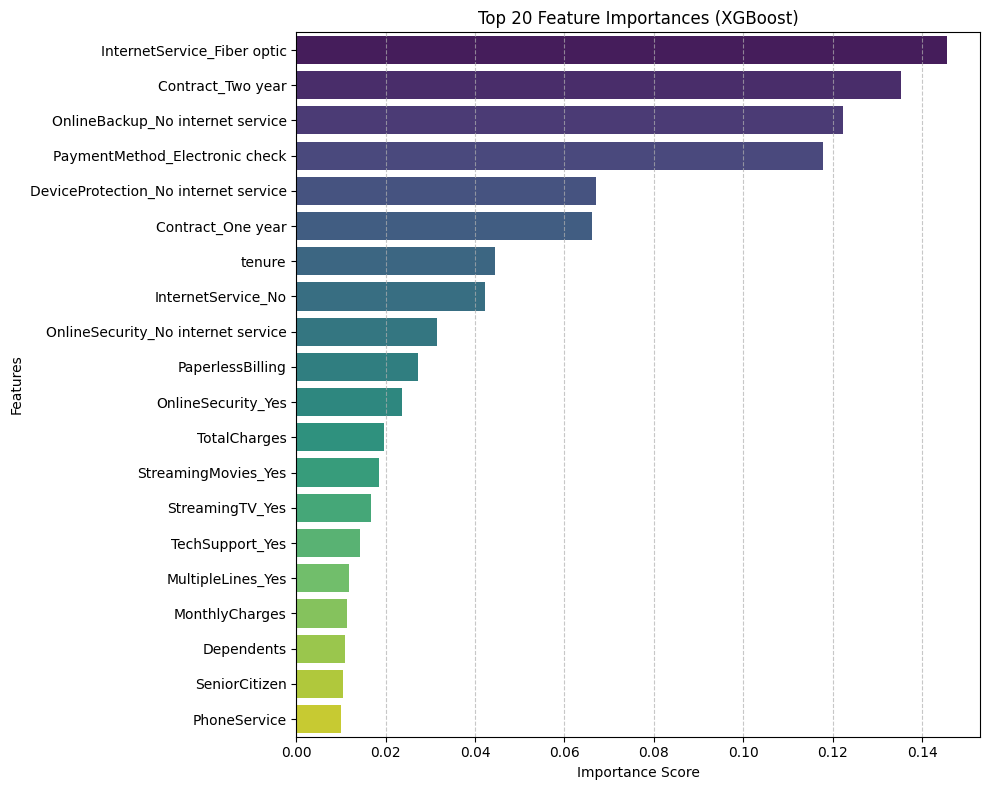


🏆 [모델이 꼽은 이탈 핵심 요인 TOP 5]
1. InternetService_Fiber optic : 0.1457
2. Contract_Two year : 0.1354
3. OnlineBackup_No internet service : 0.1224
4. PaymentMethod_Electronic check : 0.1177
5. DeviceProtection_No internet service : 0.0671

💡 해석 팁:
- 상위에 있는 변수일수록 고객 이탈에 결정적인 영향을 미칩니다.
- 이 변수들을 중심으로 이탈 방지 전략(쿠폰, 상담 등)을 짜야 합니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n🔍 [7단계: 변수 중요도(Feature Importance) 분석] 시작")

# 1. 중요도 추출 (모델 종류에 따라 추출 방식이 다름)
if hasattr(final_best_model, 'feature_importances_'):
    # 랜덤 포레스트, XGBoost 등 트리 기반 모델
    importances = final_best_model.feature_importances_
elif hasattr(final_best_model, 'coef_'):
    # 로지스틱 회귀 (계수의 절댓값을 중요도로 간주)
    importances = abs(final_best_model.coef_[0])
else:
    print("⚠️ 변수 중요도를 바로 추출할 수 없는 모델입니다.")
    importances = []

# 2. 시각화를 위한 데이터프레임 생성
# (X_train.columns에 변수명이 들어있다고 가정합니다)
feature_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# 3. 상위 20개 중요 변수 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index, palette='viridis')

plt.title(f'Top 20 Feature Importances ({best_model_name})')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. 핵심 변수 텍스트 출력
print("\n🏆 [모델이 꼽은 이탈 핵심 요인 TOP 5]")
for i, (name, score) in enumerate(feature_imp.head(5).items(), 1):
    print(f"{i}. {name} : {score:.4f}")

print("\n💡 해석 팁:")
print("- 상위에 있는 변수일수록 고객 이탈에 결정적인 영향을 미칩니다.")
print("- 이 변수들을 중심으로 이탈 방지 전략(쿠폰, 상담 등)을 짜야 합니다.")